# 1) Delivery_time -> Predict delivery time using sorting time 

## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

## 2. Importing Data

In [154]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3. Data Understanding

In [155]:
print("No. of observations:{}\nNo. of Features:{}".format(data.shape[0],data.shape[1]))

No. of observations:21
No. of Features:2


In [156]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [157]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [158]:
data.describe(include="all")

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## 4. Checking for the assumptions

Text(0, 0.5, 'Delivery Time')

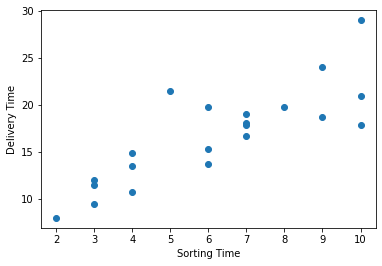

In [159]:
plt.scatter(x=data["Sorting Time"],y=data["Delivery Time"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

Text(0, 0.5, 'Delivery Time')

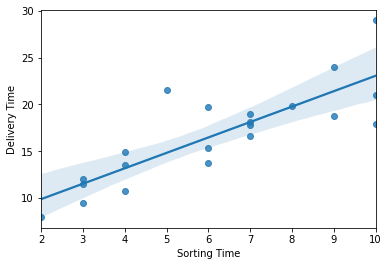

In [160]:
sns.regplot(x=data["Sorting Time"],y=data["Delivery Time"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

<AxesSubplot:xlabel='Sorting Time'>

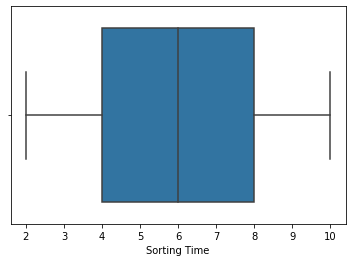

In [161]:
sns.boxplot(data["Sorting Time"])

<AxesSubplot:xlabel='Delivery Time'>

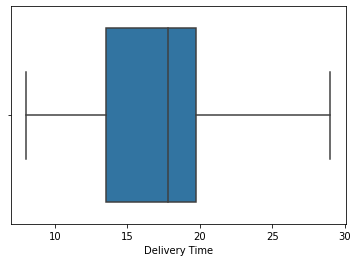

In [162]:
sns.boxplot(data["Delivery Time"])

In [163]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### -->Shows some linearity and no outliers.

#### --> No multicollinearity

#### --> No auto-regression

## 5. Data Preparation

In [164]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [165]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

### Feature Engineering

In [166]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 6. Model building || Model Testing

### 6[a] No Transformation

In [204]:
model=smf.ols(formula="delivery_time~sorting_time",data=data).fit()

In [205]:
#To find the co-efficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [206]:
#To find pvalues and tvalues
print("pvalues: ",model.pvalues) 
print("tvalues: ",model.tvalues)

pvalues:  Intercept       0.001147
sorting_time    0.000004
dtype: float64
tvalues:  Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [207]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        02:49:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[b] log transformation of x and y

In [208]:
data["delivery_time_log"]=np.log(data["delivery_time"])
data["sorting_time_log"]=np.log(data["sorting_time"])
data.head()

,delivery_time,sorting_time,delivery_time_log,sorting_time_log,delivery_time_sqrt,sorting_time_sqrt
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


In [209]:
log_model=smf.ols(formula='delivery_time_log~sorting_time_log',data=data).fit()

In [210]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.60e-07
Time:                        02:49:30   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
sorting_time_log     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[c] log transformation of x

In [211]:
log_model_1=smf.ols(formula="delivery_time~sorting_time_log",data=data).fit()

In [212]:
log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        02:49:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
sorting_time_log     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[d] Log transformation of y

In [213]:
log_model_2=smf.ols(formula="delivery_time_log~sorting_time",data=data).fit()

In [214]:
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.59e-06
Time:                        02:49:32   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[e] sqrt transformation of x and y

In [215]:
data["delivery_time_sqrt"]=np.sqrt(data["delivery_time"])
data["sorting_time_sqrt"]=np.sqrt(data["sorting_time"])
data.head()

,delivery_time,sorting_time,delivery_time_log,sorting_time_log,delivery_time_sqrt,sorting_time_sqrt
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278


In [216]:
sqrt_model=smf.ols(formula="delivery_time_sqrt~sorting_time_sqrt",data=data).fit()

In [217]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     delivery_time_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           8.48e-07
Time:                        02:49:35   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
sorting_time_sqrt     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[f] sqrt transformation of x

In [218]:
sqrt_model_1=smf.ols(formula="delivery_time~sorting_time_sqrt",data=data).fit()

In [219]:
sqrt_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.61e-06
Time:                        02:49:38   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sorting_time_sqrt     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6[e] sqrt transformation of y

In [201]:
sqrt_model_2=smf.ols(formula="delivery_time_sqrt~sorting_time",data=data).fit()

In [203]:
sqrt_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     delivery_time_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.00e-06
Time:                        02:45:12   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Output Interpretation
### We will use sqrt_model as it has the best R square value



## 7. Model Deployment

In [229]:
from pickle import dump
dump(sqrt_model,open("sqrt_model.pkl","wb"))